In [209]:
ref_lin="https://towardsdatascience.com/topic-modeling-with-nlp-on-amazon-reviews-an-application-of-latent-dirichlet-allocation-lda-ae42a4c8b369"
data_prep_link="https://medium.com/analytics-vidhya/text-preprocessing-for-nlp-natural-language-processing-beginners-to-master-fd82dfecf95"

In [ ]:
### imp preprocessing link
# https://www.geeksforgeeks.org/python-extract-hashtags-from-text/?ref=rp
# https://www.geeksforgeeks.org/generating-word-cloud-python/
# https://towardsdatascience.com/create-a-complete-machine-learning-web-application-using-react-and-flask-859340bddb33
# https://medium.com/analytics-vidhya/text-preprocessing-for-nlp-natural-language-processing-beginners-to-master-fd82dfecf95

In [ ]:
#  course and practical examples

# https://www.youtube.com/playlist?list=PLtmWHNX-gukKocXQOkQjuVxglSDYWsSh9
# https://github.com/fastai/course-nlp

In [189]:
import pandas as pd
import numpy as np
import os
import warnings
warnings.filterwarnings("ignore")

In [193]:
path='C:\\Users\\lokesh_pc\\NLP_Projects\\amazon_sentiment_topic_modelling_cleanning_end_to_end\\'
data=pd.read_csv(path+'Reviews.csv')
print("*"*100)
print("shape of data is: {}".format(data.shape))
print("*"*100)
data.head(5)

****************************************************************************************************
shape of data is: (568454, 10)
****************************************************************************************************


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [194]:
data.describe().round(1).T

,count,mean,std,min,25%,50%,75%,max
Id,568454.0,2.842275e+05,164098.7,1.0,1.421142e+05,2.842275e+05,4.263408e+05,5.684540e+05
HelpfulnessNumerator,568454.0,1.700000e+00,7.6,0.0,0.000000e+00,0.000000e+00,2.000000e+00,8.660000e+02
HelpfulnessDenominator,568454.0,2.200000e+00,8.3,0.0,0.000000e+00,1.000000e+00,2.000000e+00,9.230000e+02
Score,568454.0,4.200000e+00,1.3,1.0,4.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00
Time,568454.0,1.296257e+09,48043312.3,939340800.0,1.271290e+09,1.311120e+09,1.332720e+09,1.351210e+09


In [195]:
data.isnull().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               16
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

In [197]:
###### dropping na value from dataframe and taking only 10000 rows
data.dropna(inplace=True)
data=data.sample(n=10000)
data.reset_index(inplace=True)
print("*"*100)
print("shape of data after sample {}".format(data.shape))
print("*"*100)
print("Null value in data \n{}".format(data.isnull().sum()))

****************************************************************************************************
shape of data after sample (10000, 11)
****************************************************************************************************
Null value in data 
index                     0
Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64


# text preprocessing / cleanning methods

In [7]:
# !pip install -q wordcloud
import wordcloud
from nltk.corpus import stopwords
import nltk
import string
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lokesh_pc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\lokesh_pc\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lokesh_pc\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\lokesh_pc\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [217]:
sam=data.Text[1]
sam

"This is one of the best dark comedies ever!  If you haven't seen this yet...you need to.  Watch it with friends and family.  You will be hooked!!"

In [218]:
len([x for x in sam.split() if x in stop])

11

In [219]:
## checking how many stop waord present in each text
data["stopword"]=data["Text"].apply(lambda x: len([x for x in x.split() if x in stop]))
data[["Text","stopword"]].head()

,Text,stopword
0,I was lucky enough to grab this on Woot.com al...,37
1,This is one of the best dark comedies ever! I...,11
2,I loved Amy's Lentil vegetable LOW SALT<a href...,133
3,I have been ordering YamaMotoYama Green Tea fo...,8
4,If you have not ordered a Ghirardelli product ...,18


In [220]:
sam

"This is one of the best dark comedies ever!  If you haven't seen this yet...you need to.  Watch it with friends and family.  You will be hooked!!"

In [221]:
### checking the no of punchuation in text
def count_punctuation(text):
    count=sum([1 for i in text if i in string.punctuation])
    return count

data["punctuation"]=data["Text"].apply(lambda x: count_punctuation(x))
data[["Text","punctuation"]].head(5)

,Text,punctuation
0,I was lucky enough to grab this on Woot.com al...,30
1,This is one of the best dark comedies ever! I...,9
2,I loved Amy's Lentil vegetable LOW SALT<a href...,116
3,I have been ordering YamaMotoYama Green Tea fo...,4
4,If you have not ordered a Ghirardelli product ...,11


In [222]:
### checking no of hashtag # in text

In [223]:
data["hashtag"]=data["Text"].apply(lambda x: len([i for i in x.split() if x.startswith("#")]))
data[["Text","hashtag"]].head(5)

,Text,hashtag
0,I was lucky enough to grab this on Woot.com al...,0
1,This is one of the best dark comedies ever! I...,0
2,I loved Amy's Lentil vegetable LOW SALT<a href...,0
3,I have been ordering YamaMotoYama Green Tea fo...,0
4,If you have not ordered a Ghirardelli product ...,0


In [224]:
data.hashtag.loc[data.hashtag!=0].count()

0

In [225]:
# checking numeric count in text
data["numerics"]=data["Text"].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
data[["Text","numerics"]].head(5)

,Text,numerics
0,I was lucky enough to grab this on Woot.com al...,1
1,This is one of the best dark comedies ever! I...,0
2,I loved Amy's Lentil vegetable LOW SALT<a href...,1
3,I have been ordering YamaMotoYama Green Tea fo...,0
4,If you have not ordered a Ghirardelli product ...,1


In [226]:
# checking Upper case word count 
data["no_upperword"]=data["Text"].apply(lambda x: len([x for x in x.split() if x.isupper()]))
data[["Text","no_upperword"]].head(5)

,Text,no_upperword
0,I was lucky enough to grab this on Woot.com al...,2
1,This is one of the best dark comedies ever! I...,0
2,I loved Amy's Lentil vegetable LOW SALT<a href...,17
3,I have been ordering YamaMotoYama Green Tea fo...,2
4,If you have not ordered a Ghirardelli product ...,0


In [227]:
sam

"This is one of the best dark comedies ever!  If you haven't seen this yet...you need to.  Watch it with friends and family.  You will be hooked!!"

In [228]:
b=(x.lower() for x in sam.split())
print(b)

<generator object <genexpr> at 0x000000B97C141C48>


In [229]:
" ".join(x.lower() for x in sam.split())

"this is one of the best dark comedies ever! if you haven't seen this yet...you need to. watch it with friends and family. you will be hooked!!"

In [230]:
data["Text"][0]

'I was lucky enough to grab this on Woot.com along with 3 other flavored oils (4 bottles for $44) and they are fantastic.  The garlic infusion is fragrant, leaving a delicate garlic flavor to meats and vegetables.  I have used it to marinate chicken, filet and salmon with equally good results.  Also, cooking a batch of fresh summer veggies in a little of this oil infuses a wonderful flavor into them.<br /><br />The lemon infused oil is wonderful for fish or chicken.  It has a robust flavor and a little goes a long way.<br /><br />Definitely a re-order for me!! :)'

In [231]:
# def preprocessing_text(text):
#     text=text.lower()
#     text=

# Text Cleaning Techniques

In [232]:
### 1 . converting text to lower case 
data["Text"]=data["Text"].apply(lambda x: " ".join(x.lower() for x in x.split()))
data["Text"].head()

0    i was lucky enough to grab this on woot.com al...
1    this is one of the best dark comedies ever! if...
2    i loved amy's lentil vegetable low salt<a href...
3    i have been ordering yamamotoyama green tea fo...
4    if you have not ordered a ghirardelli product ...
Name: Text, dtype: object

In [233]:
#### 2 . remove punchuation from text 
## ex.  [!”#$%&’()*+,-./:;=>?@[\]^_`{|}~]
data["Text"]=data["Text"].str.replace('[^\w\s]','')
data["Text"].head()

0    i was lucky enough to grab this on wootcom alo...
1    this is one of the best dark comedies ever if ...
2    i loved amys lentil vegetable low salta hrefht...
3    i have been ordering yamamotoyama green tea fo...
4    if you have not ordered a ghirardelli product ...
Name: Text, dtype: object

In [234]:
### 3. remove stopword 
from nltk.corpus import stopwords
stop=stopwords.words("english")
data["Text"]=data["Text"].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
data["Text"].head()

0    lucky enough grab wootcom along 3 flavored oil...
1    one best dark comedies ever havent seen yetyou...
2    loved amys lentil vegetable low salta hrefhttp...
3    ordering yamamotoyama green tea years reliable...
4    ordered ghirardelli product must knowbr receiv...
Name: Text, dtype: object

In [235]:
sam=data.sample(1)
print(sam["Text"])
pd.Series(" ".join(sam["Text"]).split()).value_counts()

6348    stretch imagination anyone thinks tastes like ...
Name: Text, dtype: object


im             2
sure           2
br             2
tastes         2
cant           2
like           2
return         1
isbr           1
drink          1
imagination    1
guess          1
itbr           1
way            1
thinks         1
vanilla        1
chemicals      1
trash          1
latte          1
provide        1
defies         1
ill            1
caffeine       1
duh            1
overall        1
advisable      1
quite          1
maybe          1
anyone         1
get            1
gritty         1
energy         1
contains       1
unpalatable    1
thanks         1
logic          1
stretch        1
dtype: int64

In [236]:
### checking most frequent word
freq=pd.Series(' '.join(data["Text"]).split()).value_counts()[:30]
freq

br         4616
like       4483
good       3393
one        3077
taste      2956
great      2926
coffee     2670
product    2623
flavor     2498
tea        2446
love       2269
food       2237
would      2203
get        1858
really     1742
much       1611
dont       1599
also       1518
use        1458
little     1454
buy        1408
find       1389
amazon     1383
best       1369
time       1363
price      1331
even       1315
tried      1302
better     1288
im         1281
dtype: int64

In [237]:
## remove some stopword from text 
add_word=["br","get","also","ive"]
stop_word=set(stopwords.words("english"))
stop_added=stop_word.union(add_word)
data["Text"]=data["Text"].apply(lambda x: " ".join(x for x in x.split() if x not in stop_added))
data["Text"].head()

0    lucky enough grab wootcom along 3 flavored oil...
1    one best dark comedies ever havent seen yetyou...
2    loved amys lentil vegetable low salta hrefhttp...
3    ordering yamamotoyama green tea years reliable...
4    ordered ghirardelli product must knowbr receiv...
Name: Text, dtype: object

In [238]:
### 4. remove url from text

In [239]:
sam="www.12212facebook.com"
re.sub(r'^https?://\S+|www\.\S+', '', sam)

''

In [240]:
def remove_url(text):
    url=re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)

data["Text"]=data["Text"].apply(lambda x: remove_url(x))
data["Text"].head()
                   

0    lucky enough grab wootcom along 3 flavored oil...
1    one best dark comedies ever havent seen yetyou...
2    loved amys lentil vegetable low salta hrefhttp...
3    ordering yamamotoyama green tea years reliable...
4    ordered ghirardelli product must knowbr receiv...
Name: Text, dtype: object

In [241]:
#### remove HTML tags from text
def remove_html(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)
data["Text"]=data["Text"].apply(lambda x: remove_html(x))
data["Text"].head()

0    lucky enough grab wootcom along 3 flavored oil...
1    one best dark comedies ever havent seen yetyou...
2    loved amys lentil vegetable low salta hrefhttp...
3    ordering yamamotoyama green tea years reliable...
4    ordered ghirardelli product must knowbr receiv...
Name: Text, dtype: object

In [242]:
text = """<div>
<h1>Title</h1>
<p>A long text........ </p>
<a href=""> a link </a>
</div>"""

re.sub(r'<.*?>','',text)

'\nTitle\nA long text........ \n a link \n'

In [243]:
from bs4 import BeautifulSoup

def strip_html_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    stripped_text = soup.get_text()
    return stripped_text

strip_html_tags('sdasdasdasd <h1> http://t.co/7AzE4IoGMe Risk Assessmen ')

# I will come back to this later

'sdasdasdasd  http://t.co/7AzE4IoGMe Risk Assessmen '

In [244]:
#### remove emoji from text
# Reference : https://gist.github.com/slowkow/7a7f61f495e3dbb7e3d767f97bd7304b
def remove_emoji(text): 
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)
#Example
remove_emoji("Omg another Earthquake 😔😔")

'Omg another Earthquake '

In [245]:
data["Text"]=data["Text"].apply(lambda x: remove_emoji(x))
data["Text"].head()

0    lucky enough grab wootcom along 3 flavored oil...
1    one best dark comedies ever havent seen yetyou...
2    loved amys lentil vegetable low salta hrefhttp...
3    ordering yamamotoyama green tea years reliable...
4    ordered ghirardelli product must knowbr receiv...
Name: Text, dtype: object

In [246]:
#### Remove Emoticons
#!pip install emot #package 
from emot.emo_unicode import UNICODE_EMO, EMOTICONS
# Function for removing emoticons
def remove_emoticons(text):
    emoticon_pattern = re.compile(u'(' + u'|'.join(k for k in   EMOTICONS) + u')')
    return emoticon_pattern.sub(r'', text)
#Example
remove_emoticons("Hello :-)")

'Hello '

In [247]:
data["Text"]=data["Text"].apply(lambda x: remove_emoticons(x))
data["Text"].head(5)

0    lucky enough grab wootcom along 3 flavored oil...
1    one best dark comedies ever havent seen yetyou...
2    loved amys lentil vegetable low salta hrefhttp...
3    ordering yamamotoyama green tea years reliable...
4    ordered ghirardelli product must knowbr receiv...
Name: Text, dtype: object

In [248]:
# import TextBlob 
from textblob import TextBlob 
  
gfg = TextBlob("GFG is a good compny and alays valule ttheir empployes.") 
  
# using TextBlob.correct() method 
gfg = gfg.correct() 
  
print(gfg) 

GFG is a good company and always value their employed.


In [249]:
#### spell correction 
from textblob import TextBlob
data['Text'][:5].apply(lambda x: str(TextBlob(x).correct()))

0    lucky enough grab wootcom along 3 favored oils...
1    one best dark remedies ever haven seen yetyou ...
2    loved amy until vegetable low salt hrefhttpwww...
3    ordering yamamotoyama green tea years reliable...
4    ordered ghirardelli product must know receive ...
Name: Text, dtype: object

In [250]:
# data["Text"]=data["Text"].apply(lambda x: str(TextBlob(x).correct()))
# data["Text"].head()

In [251]:
data2=data.copy()

In [257]:
from nltk.stem import WordNetLemmatizer 
from nltk.tokenize import word_tokenize 
lemmatizer = WordNetLemmatizer() 
# lemmatize string 
def lemmatize_word(text): 
    word_tokens = word_tokenize(text) 
    # provide context i.e. part-of-speech 
    lemmas = [lemmatizer.lemmatize(word, pos ='v') for word in word_tokens] 
    return lemmas 
  

data2["Text"]=data2["Text"].apply(lambda x: lemmatize_word(x))
data2["Text"]=data2["Text"].apply(lambda x: " ".join(x))

In [252]:
from nltk.stem.porter import PorterStemmer 
from nltk.tokenize import word_tokenize 
stemmer = PorterStemmer() 
  
# stem words in the list of tokenised words 
def stem_words(text): 
    word_tokens = word_tokenize(text) 
    stems = [stemmer.stem(word) for word in word_tokens] 
    return stems 
  
data["Text"]=data["Text"].apply(lambda x: stem_words(x))
data["Text"]=data["Text"].apply(lambda x: " ".join(x))

In [260]:
#### count word ,count char,count avg word in each text
data2["word_count"]=data2["Text"].apply(lambda x: len(str(x).split(" ")))
data2["char_count"]=data2["Text"].str.len()

In [261]:
def avg_word(sentence):
    words = sentence.split()
    return (sum(len(word) for word in words)/(len(words)+0.000001))
data2['avg_word'] = data2['Text'].apply(lambda x: avg_word(x)).round(1)
data2[['Text','word_count','char_count','avg_word']].head()

,Text,word_count,char_count,avg_word
0,lucky enough grab wootcom along 3 flavor oil 4...,54,359,5.7
1,one best dark comedies ever havent see yetyou ...,13,76,4.9
2,love amys lentil vegetable low salta hrefhttpw...,185,1254,5.8
3,order yamamotoyama green tea years reliable so...,13,84,5.5
4,order ghirardelli product must knowbr receive ...,23,157,5.9


In [264]:
df=data.copy()

In [265]:
# Apply a first round of text cleaning techniques
import re
import string

def clean_text_round1(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

round1 = lambda x: clean_text_round1(x)
df['Text'] = df.Text.apply(round1)
df.Text

0       lucki enough grab wootcom along  flavor oil  b...
1       one best dark comedi ever havent seen yetyou n...
2       love ami lentil veget low salta  organ lentil ...
3       order yamamotoyama green tea year reliabl sour...
4       order ghirardelli product must knowbr receiv g...
                              ...                        
9995    base first two review order  bottl chocol extr...
9996    walden farm marshmallow dip good find perhap c...
9997    spice fine bottl tall narrow pictur instead sh...
9998    note review chili lime flavor popchip amazon s...
9999    bought bird food infest moth egg time found ho...
Name: Text, Length: 10000, dtype: object

In [266]:
# Apply a second round of cleaning
def clean_text_round2(text):
    '''Get rid of some additional punctuation and non-sensical text that was missed the first time around.'''
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    return text

round2 = lambda x: clean_text_round2(x)

In [267]:
df['Text'] = df.Text.apply(round2)
df.Text

0       lucki enough grab wootcom along  flavor oil  b...
1       one best dark comedi ever havent seen yetyou n...
2       love ami lentil veget low salta  organ lentil ...
3       order yamamotoyama green tea year reliabl sour...
4       order ghirardelli product must knowbr receiv g...
                              ...                        
9995    base first two review order  bottl chocol extr...
9996    walden farm marshmallow dip good find perhap c...
9997    spice fine bottl tall narrow pictur instead sh...
9998    note review chili lime flavor popchip amazon s...
9999    bought bird food infest moth egg time found ho...
Name: Text, Length: 10000, dtype: object

In [11]:
data_copy=data.copy()

In [14]:
data=data[["Score","Text"]].copy()

In [15]:
data["Text_old"]=data["Text"].copy()


In [16]:
data.head()

,Score,Text,Text_old
0,5,"I call this product, ""puppy crack"". I have a ...","I call this product, ""puppy crack"". I have a ..."
1,5,"For the longest time, I've found it difficult ...","For the longest time, I've found it difficult ..."
2,4,This is a good choice for anyone who likes sal...,This is a good choice for anyone who likes sal...
3,4,I got this for my dog about a week ago because...,I got this for my dog about a week ago because...
4,4,"I typically get the brownie crunch flavor, but...","I typically get the brownie crunch flavor, but..."


# Preprocessing the raw text:

## This involves the following:

I. Removing URL.
II. Removing all irrelevant characters (Numbers and Punctuation).
III. Convert all characters into lowercase.
IV. Tokenization
V. Removing Stopwords
VI. Stemming and Lemmatization
VII. Remove the words having length <= 2
VIII. Convert the list of tokens into back to the string

In [17]:
data["Text"][2]

'This is a good choice for anyone who likes salmon, even if they have never made the leap to salmon roe. It lacks subtlety; it is a bit on the salty side, and the smokiness is a bit strong, but that can help to ease the impact of these little salmon-bombs for one who is new to the experience.'

In [19]:
### 1. remove url 
import re
def remove_url(text):
    return re.sub(r'https\S+','',text)
data["Text"]=data["Text"].apply(lambda x: remove_url(x))

### 2. Removing all irrelevant characters (Numbers and Punctuation)
def remove_non_alphanumeric(text):
    return re.sub('[^a-zA-Z]',' ',text)
data["Text"]=data["Text"].apply(lambda x: remove_non_alphanumeric(x))

### 3. Convert all characters into lowercase
def char_lower(text):
    return str(text).lower()
data["Text"]=data["Text"].apply(lambda x: char_lower(x))

### 4. Tokenization
import nltk
from nltk.tokenize import word_tokenize

def word_token(text):
    return word_tokenize(text)
data["Text"]=data["Text"].apply(lambda x: word_token(x))

In [20]:
data.head()

,Score,Text,Text_old
0,5,"[i, call, this, product, puppy, crack, i, have...","I call this product, ""puppy crack"". I have a ..."
1,5,"[for, the, longest, time, i, ve, found, it, di...","For the longest time, I've found it difficult ..."
2,4,"[this, is, a, good, choice, for, anyone, who, ...",This is a good choice for anyone who likes sal...
3,4,"[i, got, this, for, my, dog, about, a, week, a...",I got this for my dog about a week ago because...
4,4,"[i, typically, get, the, brownie, crunch, flav...","I typically get the brownie crunch flavor, but..."


In [38]:
### 5. Removing Stopwords
from nltk.corpus import stopwords
stopwords.words("english")
stop_words=set(stopwords.words("english"))
def remove_stopword(text):
    return [x for x in text if x not in stop_words]
data["Text"]=data["Text"].apply(lambda x: remove_stopword(x))

In [49]:
print(data.Text_old[1])
print(data.Text[1])

For the longest time, I've found it difficult to justify blowing $3 on a bowl of instant ramen. Sure, the stuff's imported and most of what you're paying for is the cost of shipping from Japan. You can also get pretty decent domestic bowl ramen for around $1 a bowl. But since most of the ramen bowls coming from SoCal are Korean made (i.e., spicy), it's difficult to find a decent mild flavored Japanese ramen bowl. Menraku Shoyu is mildly flavored (just soy sauce) and not painfully salty like Nongshim, so I don't have to throw out half the flavor packet. The texture of the noodles has a nice bit to it. I don't get these very often since they're relatively expensive, but you get what you paid for. Highly recommended if you want a real Japanese style ramen and want a subtle flavor that isn't spicy.
['longest', 'time', 'found', 'difficult', 'justify', 'blowing', 'bowl', 'instant', 'ramen', 'sure', 'stuff', 'imported', 'paying', 'cost', 'shipping', 'japan', 'also', 'get', 'pretty', 'decent',

In [51]:
### 6. Stemming and Lemmatization

#6.1 Stemming

from nltk.stem import PorterStemmer
stemmer=PorterStemmer()
def stemming_word(text):
    return [stemmer.stem(i) for i in text]
data["Text_stem"]=data["Text"].apply(lambda x: stemming_word(x))

In [53]:
print(data.Text_old[1])
print("*"*30)
print(data.Text[1])
print("*"*30)
print(data["Text_stem"][1])

For the longest time, I've found it difficult to justify blowing $3 on a bowl of instant ramen. Sure, the stuff's imported and most of what you're paying for is the cost of shipping from Japan. You can also get pretty decent domestic bowl ramen for around $1 a bowl. But since most of the ramen bowls coming from SoCal are Korean made (i.e., spicy), it's difficult to find a decent mild flavored Japanese ramen bowl. Menraku Shoyu is mildly flavored (just soy sauce) and not painfully salty like Nongshim, so I don't have to throw out half the flavor packet. The texture of the noodles has a nice bit to it. I don't get these very often since they're relatively expensive, but you get what you paid for. Highly recommended if you want a real Japanese style ramen and want a subtle flavor that isn't spicy.
******************************
['longest', 'time', 'found', 'difficult', 'justify', 'blowing', 'bowl', 'instant', 'ramen', 'sure', 'stuff', 'imported', 'paying', 'cost', 'shipping', 'japan', 'al

In [54]:
# 6.2 Lemmatization
from nltk.stem import WordNetLemmatizer
lemma=WordNetLemmatizer()
def lemm_word(text):
    return [lemma.lemmatize(word=i,pos="v") for i in text]
data["Text_lemm"]=data["Text"].apply(lambda x: lemm_word(x))

In [55]:
print(data.Text_old[1])
print("*"*30)
print(data.Text[1])
print("*"*30)
print(data["Text_stem"][1])
print("*"*30)
print(data["Text_lemm"][1])

For the longest time, I've found it difficult to justify blowing $3 on a bowl of instant ramen. Sure, the stuff's imported and most of what you're paying for is the cost of shipping from Japan. You can also get pretty decent domestic bowl ramen for around $1 a bowl. But since most of the ramen bowls coming from SoCal are Korean made (i.e., spicy), it's difficult to find a decent mild flavored Japanese ramen bowl. Menraku Shoyu is mildly flavored (just soy sauce) and not painfully salty like Nongshim, so I don't have to throw out half the flavor packet. The texture of the noodles has a nice bit to it. I don't get these very often since they're relatively expensive, but you get what you paid for. Highly recommended if you want a real Japanese style ramen and want a subtle flavor that isn't spicy.
******************************
['longest', 'time', 'found', 'difficult', 'justify', 'blowing', 'bowl', 'instant', 'ramen', 'sure', 'stuff', 'imported', 'paying', 'cost', 'shipping', 'japan', 'al

In [56]:
#### Lets consider lemmatizer output further 
data["Text"]=data["Text"].apply(lambda x: lemm_word(x))

In [57]:
data.head()

,Score,Text,Text_old,Text_stem,Text_lemm
0,5,"[call, product, puppy, crack, month, old, lab,...","I call this product, ""puppy crack"". I have a ...","[call, product, puppi, crack, month, old, lab,...","[call, product, puppy, crack, month, old, lab,..."
1,5,"[longest, time, find, difficult, justify, blow...","For the longest time, I've found it difficult ...","[longest, time, found, difficult, justifi, blo...","[longest, time, find, difficult, justify, blow..."
2,4,"[good, choice, anyone, like, salmon, even, nev...",This is a good choice for anyone who likes sal...,"[good, choic, anyon, like, salmon, even, never...","[good, choice, anyone, like, salmon, even, nev..."
3,4,"[get, dog, week, ago, eat, food, fast, often, ...",I got this for my dog about a week ago because...,"[got, dog, week, ago, eat, food, fast, often, ...","[get, dog, week, ago, eat, food, fast, often, ..."
4,4,"[typically, get, brownie, crunch, flavor, happ...","I typically get the brownie crunch flavor, but...","[typic, get, browni, crunch, flavor, happen, g...","[typically, get, brownie, crunch, flavor, happ..."


In [65]:
print(data["Text"][1])
print([i for i in data["Text"][1] if len(i)>2])

['longest', 'time', 'find', 'difficult', 'justify', 'blow', 'bowl', 'instant', 'ramen', 'sure', 'stuff', 'import', 'pay', 'cost', 'ship', 'japan', 'also', 'get', 'pretty', 'decent', 'domestic', 'bowl', 'ramen', 'around', 'bowl', 'since', 'ramen', 'bowl', 'come', 'socal', 'korean', 'make', 'e', 'spicy', 'difficult', 'find', 'decent', 'mild', 'flavor', 'japanese', 'ramen', 'bowl', 'menraku', 'shoyu', 'mildly', 'flavor', 'soy', 'sauce', 'painfully', 'salty', 'like', 'nongshim', 'throw', 'half', 'flavor', 'packet', 'texture', 'noodles', 'nice', 'bite', 'get', 'often', 'since', 'relatively', 'expensive', 'get', 'pay', 'highly', 'recommend', 'want', 'real', 'japanese', 'style', 'ramen', 'want', 'subtle', 'flavor', 'spicy']
['longest', 'time', 'find', 'difficult', 'justify', 'blow', 'bowl', 'instant', 'ramen', 'sure', 'stuff', 'import', 'pay', 'cost', 'ship', 'japan', 'also', 'get', 'pretty', 'decent', 'domestic', 'bowl', 'ramen', 'around', 'bowl', 'since', 'ramen', 'bowl', 'come', 'socal', '

In [66]:
### 7. Remove the words having length <= 2 
def remove_small_len_word(text):
    return [i for i in text if len(i) > 2]
data["Text"]=data["Text"].apply(lambda x: remove_small_len_word(x))

In [80]:
" ".join(data["Text"][1])

'longest time find difficult justify blow bowl instant ramen sure stuff import pay cost ship japan also get pretty decent domestic bowl ramen around bowl since ramen bowl come socal korean make spicy difficult find decent mild flavor japanese ramen bowl menraku shoyu mildly flavor soy sauce painfully salty like nongshim throw half flavor packet texture noodles nice bite get often since relatively expensive get pay highly recommend want real japanese style ramen want subtle flavor spicy'

In [82]:
### 8. Convert the list of tokens into back to the string 
def convert_to_string(text):
    return ' '.join(text)
data["Text"]=data["Text"].apply(lambda x: convert_to_string(x))

In [83]:
data.head()

,Score,Text,Text_old,Text_stem,Text_lemm
0,5,call product puppy crack month old lab pup typ...,"I call this product, ""puppy crack"". I have a ...","[call, product, puppi, crack, month, old, lab,...","[call, product, puppy, crack, month, old, lab,..."
1,5,longest time find difficult justify blow bowl ...,"For the longest time, I've found it difficult ...","[longest, time, found, difficult, justifi, blo...","[longest, time, find, difficult, justify, blow..."
2,4,good choice anyone like salmon even never make...,This is a good choice for anyone who likes sal...,"[good, choic, anyon, like, salmon, even, never...","[good, choice, anyone, like, salmon, even, nev..."
3,4,get dog week ago eat food fast often want huma...,I got this for my dog about a week ago because...,"[got, dog, week, ago, eat, food, fast, often, ...","[get, dog, week, ago, eat, food, fast, often, ..."
4,4,typically get brownie crunch flavor happen gra...,"I typically get the brownie crunch flavor, but...","[typic, get, browni, crunch, flavor, happen, g...","[typically, get, brownie, crunch, flavor, happ..."


In [84]:
data_copy1=data_copy.copy()
data_copy1.head(1)

,index,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,516266,516267,B000H1217M,A3M4JATDUBEULY,Calayus,0,0,5,1344643200,My Dog & Pup LOVE it!,"I call this product, ""puppy crack"". I have a ..."


# Final data preprocessing for our problem statement

In [155]:
contractions = {
"ain't": "am not / are not",
"aren't": "are not / am not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had / he would",
"he'd've": "he would have",
"he'll": "he shall / he will",
"he'll've": "he shall have / he will have",
"he's": "he has / he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has / how is",
"i'd": "I had / I would",
"i'd've": "I would have",
"i'll": "I shall / I will",
"i'll've": "I shall have / I will have",
"i'm": "I am",
"i've": "I have",
"isn't": "is not",
"it'd": "it had / it would",
"it'd've": "it would have",
"it'll": "it shall / it will",
"it'll've": "it shall have / it will have",
"it's": "it has / it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had / she would",
"she'd've": "she would have",
"she'll": "she shall / she will",
"she'll've": "she shall have / she will have",
"she's": "she has / she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as / so is",
"that'd": "that would / that had",
"that'd've": "that would have",
"that's": "that has / that is",
"there'd": "there had / there would",
"there'd've": "there would have",
"there's": "there has / there is",
"they'd": "they had / they would",
"they'd've": "they would have",
"they'll": "they shall / they will",
"they'll've": "they shall have / they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had / we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall / what will",
"what'll've": "what shall have / what will have",
"what're": "what are",
"what's": "what has / what is",
"what've": "what have",
"when's": "when has / when is",
"when've": "when have",
"where'd": "where did",
"where's": "where has / where is",
"where've": "where have",
"who'll": "who shall / who will",
"who'll've": "who shall have / who will have",
"who's": "who has / who is",
"who've": "who have",
"why's": "why has / why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had / you would",
"you'd've": "you would have",
"you'll": "you shall / you will",
"you'll've": "you shall have / you will have",
"you're": "you are",
"you've": "you have",
"you're":"you are",
"don't" :"do not"
}

In [156]:
text="What's the best way to ensure this?"
for word in text.split():
    if word.lower() in contractions:
        text = text.replace(word, contractions[word.lower()])
print(text)

what has / what is the best way to ensure this?


In [132]:
final_df=data_copy[["Score","Text"]]
final_df["old_text"]=final_df.Text.copy()
final_df.shape

(10000, 3)

In [157]:
final_df.Text[1]

"For the longest time, I've found it difficult to justify blowing $3 on a bowl of instant ramen. Sure, the stuff's imported and most of what you're paying for is the cost of shipping from Japan. You can also get pretty decent domestic bowl ramen for around $1 a bowl. But since most of the ramen bowls coming from SoCal are Korean made (i.e., spicy), it's difficult to find a decent mild flavored Japanese ramen bowl. Menraku Shoyu is mildly flavored (just soy sauce) and not painfully salty like Nongshim, so I don't have to throw out half the flavor packet. The texture of the noodles has a nice bit to it. I don't get these very often since they're relatively expensive, but you get what you paid for. Highly recommended if you want a real Japanese style ramen and want a subtle flavor that isn't spicy."

In [158]:

def change(text):
    for word in text.split():
        if word.lower() in contractions:
            return text.replace(word,contractions[word.lower()])
print(final_df.Text[1])    
change(final_df.Text[1])

For the longest time, I've found it difficult to justify blowing $3 on a bowl of instant ramen. Sure, the stuff's imported and most of what you're paying for is the cost of shipping from Japan. You can also get pretty decent domestic bowl ramen for around $1 a bowl. But since most of the ramen bowls coming from SoCal are Korean made (i.e., spicy), it's difficult to find a decent mild flavored Japanese ramen bowl. Menraku Shoyu is mildly flavored (just soy sauce) and not painfully salty like Nongshim, so I don't have to throw out half the flavor packet. The texture of the noodles has a nice bit to it. I don't get these very often since they're relatively expensive, but you get what you paid for. Highly recommended if you want a real Japanese style ramen and want a subtle flavor that isn't spicy.


"For the longest time, I have found it difficult to justify blowing $3 on a bowl of instant ramen. Sure, the stuff's imported and most of what you're paying for is the cost of shipping from Japan. You can also get pretty decent domestic bowl ramen for around $1 a bowl. But since most of the ramen bowls coming from SoCal are Korean made (i.e., spicy), it's difficult to find a decent mild flavored Japanese ramen bowl. Menraku Shoyu is mildly flavored (just soy sauce) and not painfully salty like Nongshim, so I don't have to throw out half the flavor packet. The texture of the noodles has a nice bit to it. I don't get these very often since they're relatively expensive, but you get what you paid for. Highly recommended if you want a real Japanese style ramen and want a subtle flavor that isn't spicy."

In [151]:
def change_to_full_form(text):
    for word in text.split():
        if word.lower() in contractions:
            return text.replace(word,contractions[word.lower()])
final_df["clean_text"]=final_df["Text"].apply(lambda x: change_to_full_form(x))

In [152]:
final_df.clean_text[1]

"For the longest time, I have found it difficult to justify blowing $3 on a bowl of instant ramen. Sure, the stuff's imported and most of what you're paying for is the cost of shipping from Japan. You can also get pretty decent domestic bowl ramen for around $1 a bowl. But since most of the ramen bowls coming from SoCal are Korean made (i.e., spicy), it's difficult to find a decent mild flavored Japanese ramen bowl. Menraku Shoyu is mildly flavored (just soy sauce) and not painfully salty like Nongshim, so I don't have to throw out half the flavor packet. The texture of the noodles has a nice bit to it. I don't get these very often since they're relatively expensive, but you get what you paid for. Highly recommended if you want a real Japanese style ramen and want a subtle flavor that isn't spicy."

In [163]:
#### another way to perform full form of verb
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

final_df["clean_text"]=final_df["Text"].apply(lambda x: decontracted(str(x).lower()))

In [165]:
final_df.clean_text[1]

'for the longest time, i have found it difficult to justify blowing $3 on a bowl of instant ramen. sure, the stuff is imported and most of what you are paying for is the cost of shipping from japan. you can also get pretty decent domestic bowl ramen for around $1 a bowl. but since most of the ramen bowls coming from socal are korean made (i.e., spicy), it is difficult to find a decent mild flavored japanese ramen bowl. menraku shoyu is mildly flavored (just soy sauce) and not painfully salty like nongshim, so i do not have to throw out half the flavor packet. the texture of the noodles has a nice bit to it. i do not get these very often since they are relatively expensive, but you get what you paid for. highly recommended if you want a real japanese style ramen and want a subtle flavor that is not spicy.'

In [166]:
###### all above step in one function 
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

stop_word=set(stopwords.words("english"))
lemm=WordNetLemmatizer()

def data_preprocessing(text):
    text=re.sub(r'http\S+','',text)
    text=re.sub('a-zA-Z','',text)
    text=str(text).lower()
    text=word_tokenize(text)
    text=[i for i in text if i not in stop_word]
    text=[lemm.lemmatize(word=i,pos="v") for i in text]
    text=[i for i in text if len(i) > 2]
    text=' '.join(text)
    return text

final_df["clean_text"]=final_df["clean_text"].apply(lambda x: data_preprocessing(x))

In [168]:
final_df[["Text","clean_text","Score"]].head()

,Text,clean_text,Score
0,"I call this product, ""puppy crack"". I have a ...",call product puppy crack month old lab pup typ...,5
1,"For the longest time, I've found it difficult ...",longest time find difficult justify blow bowl ...,5
2,This is a good choice for anyone who likes sal...,good choice anyone like salmon even never make...,4
3,I got this for my dog about a week ago because...,get dog week ago eat food fast often want huma...,4
4,"I typically get the brownie crunch flavor, but...",typically get brownie crunch flavor happen gra...,4


In [171]:
#### label the rating column or target column
def lebelchange(n):
    if n>=4:
        return "positive"
    elif n<=2:
        return "negative"
    else:
        return "nuetral"
final_df["target"]=final_df["Score"].apply(lambda x: lebelchange(x))        

In [172]:
final_df[["Score","target","Text","clean_text"]].head()

,Score,target,Text,clean_text
0,5,positive,"I call this product, ""puppy crack"". I have a ...",call product puppy crack month old lab pup typ...
1,5,positive,"For the longest time, I've found it difficult ...",longest time find difficult justify blow bowl ...
2,4,positive,This is a good choice for anyone who likes sal...,good choice anyone like salmon even never make...
3,4,positive,I got this for my dog about a week ago because...,get dog week ago eat food fast often want huma...
4,4,positive,"I typically get the brownie crunch flavor, but...",typically get brownie crunch flavor happen gra...


# text visulization

In [173]:
## split the data with respect to target
positive_review=final_df[final_df.target=="positive"]["clean_text"]
negative_review=final_df[final_df.target=="negative"]["clean_text"]
neutral_review=final_df[final_df.target=="nuetral"]["clean_text"]

In [174]:
positive_review[1]

'longest time find difficult justify blow bowl instant ramen sure stuff import pay cost ship japan also get pretty decent domestic bowl ramen around bowl since ramen bowl come socal korean make i.e. spicy difficult find decent mild flavor japanese ramen bowl menraku shoyu mildly flavor soy sauce painfully salty like nongshim throw half flavor packet texture noodles nice bite get often since relatively expensive get pay highly recommend want real japanese style ramen want subtle flavor spicy'

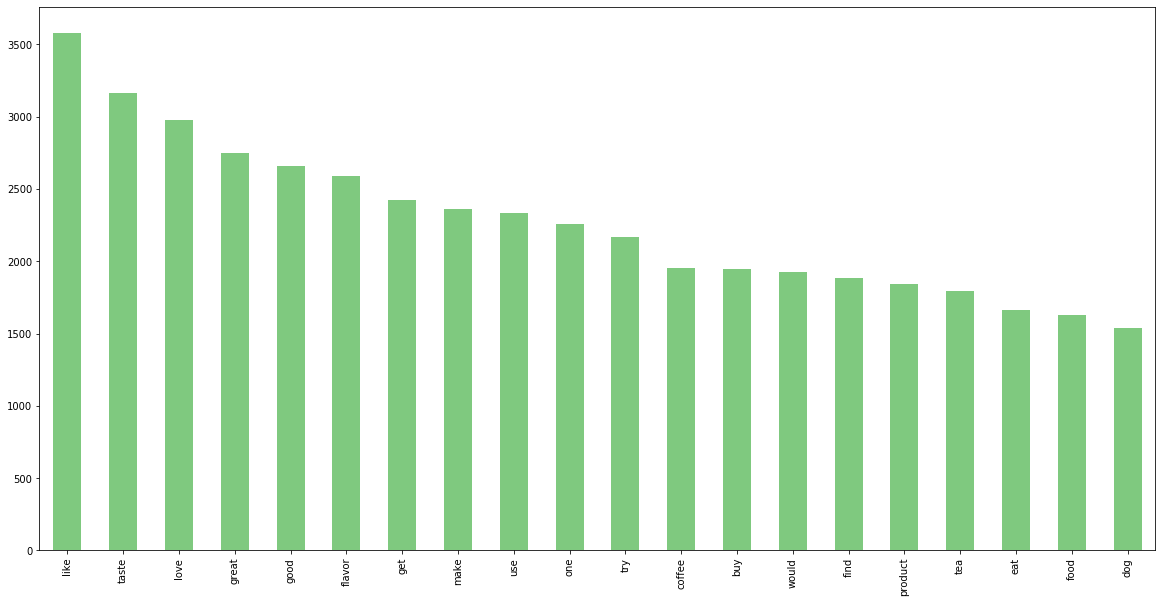

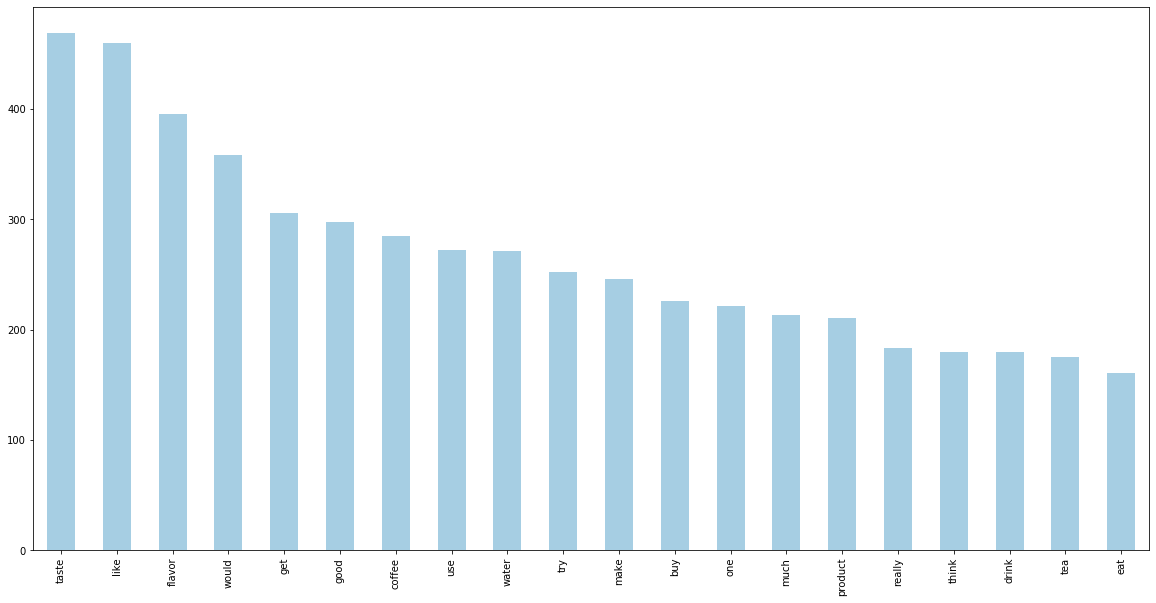

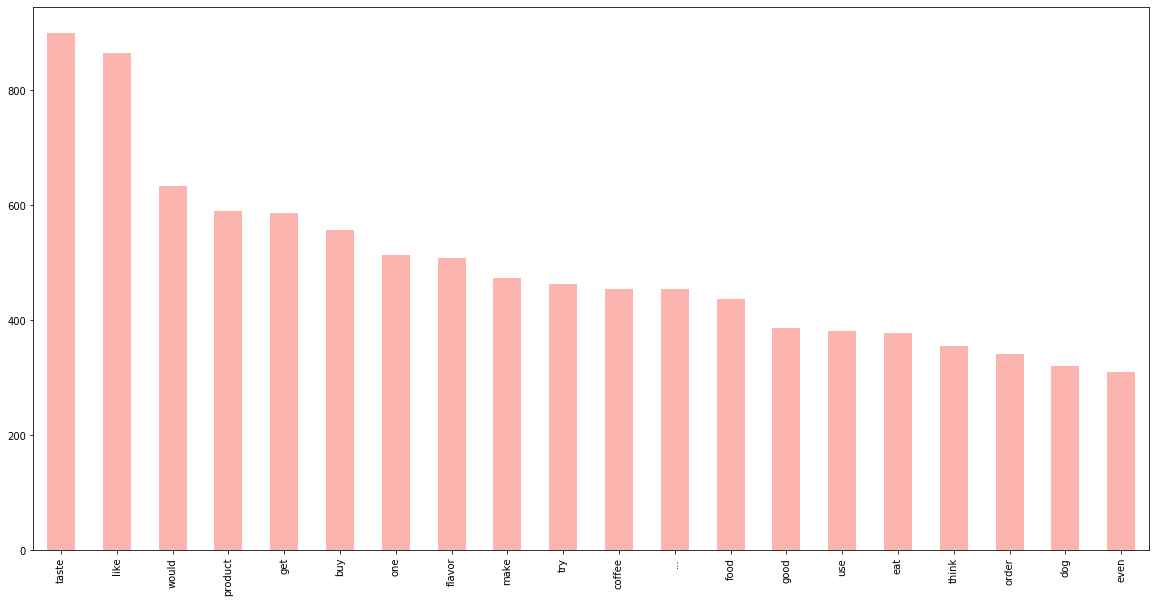

In [175]:
#### taking top 20 word and visulaize and see frequency of word 
import matplotlib.pyplot as plt
color=['Accent','Paired','Pastel1']
splitdata=[positive_review,neutral_review,negative_review]
for i in range(3):
    plt.figure(figsize=(20,10))
    pd.Series(' '.join([i for i in splitdata[i]]).split()).value_counts().head(20).plot(kind='bar',colormap=color[i])
    plt.show

In [176]:
### checking most frequent word
freq_positive_review=pd.Series(' '.join(positive_review).split()).value_counts()[:30]
freq_positive_review

like       3582
taste      3167
love       2977
great      2746
good       2662
flavor     2589
get        2423
make       2362
use        2332
one        2255
try        2165
coffee     1955
buy        1945
would      1925
find       1887
product    1840
tea        1796
eat        1665
food       1628
dog        1539
...        1362
time       1356
really     1350
price      1205
little     1199
much       1196
best       1188
also       1159
order      1125
bag        1116
dtype: int64

In [177]:
freq_neutral_review=pd.Series(' '.join(neutral_review).split()).value_counts()[:30]
freq_neutral_review

taste      469
like       460
flavor     395
would      358
get        306
good       297
coffee     285
use        272
water      271
try        252
make       246
buy        226
one        221
much       213
product    210
really     183
think      180
drink      180
tea        175
eat        161
better     159
little     153
find       152
...        152
give       151
add        145
say        142
price      139
love       135
dog        134
dtype: int64

In [178]:
freq_negative_review=pd.Series(' '.join(negative_review).split()).value_counts()[:30]
freq_negative_review

taste      900
like       865
would      633
product    589
get        587
buy        556
one        513
flavor     509
make       473
try        463
coffee     455
...        455
food       436
good       387
use        381
eat        378
think      355
order      341
dog        321
even       310
tea        298
time       288
amazon     282
find       277
love       276
bag        276
box        273
give       253
really     251
look       251
dtype: int64

In [179]:
(freq_negative_review.index).intersection(freq_positive_review.index).intersection(freq_neutral_review.index)

Index(['taste', 'like', 'would', 'product', 'get', 'buy', 'one', 'flavor',
       'make', 'try', 'coffee', '...', 'good', 'use', 'eat', 'dog', 'tea',
       'find', 'love', 'really'],
      dtype='object')

In [183]:
extra_word=['taste', 'like', 'would', 'product', 'get', 'buy', 'one', 'flavor',
       'make', 'try', 'coffee', '...', 'good', 'use', 'eat', 'dog', 'tea',
       'find', 'love', 'really']
def extra_word_remove(text):
    return ' '.join([i for i in text.split() if i  not in extra_word])

final_df["clean_text_1"]=final_df["clean_text"].apply(lambda x: extra_word_remove(x))

In [184]:
final_df.head()

,Score,Text,old_text,clean_text,target,clean_text_1
0,5,"I call this product, ""puppy crack"". I have a ...","I call this product, ""puppy crack"". I have a ...",call product puppy crack month old lab pup typ...,positive,call puppy crack month old lab pup type labrad...
1,5,"For the longest time, I've found it difficult ...","For the longest time, I've found it difficult ...",longest time find difficult justify blow bowl ...,positive,longest time difficult justify blow bowl insta...
2,4,This is a good choice for anyone who likes sal...,This is a good choice for anyone who likes sal...,good choice anyone like salmon even never make...,positive,choice anyone salmon even never leap salmon ro...
3,4,I got this for my dog about a week ago because...,I got this for my dog about a week ago because...,get dog week ago eat food fast often want huma...,positive,week ago food fast often want humans sole sour...
4,4,"I typically get the brownie crunch flavor, but...","I typically get the brownie crunch flavor, but...",typically get brownie crunch flavor happen gra...,positive,typically brownie crunch happen grab white cho...


In [187]:
freq=pd.Series(' '.join(final_df["clean_text_1"]).split()).value_counts()[:30]
freq

great     3052
food      2185
time      1778
much      1652
order     1578
price     1550
little    1531
bag       1498
drink     1493
think     1481
also      1473
give      1453
amazon    1453
even      1384
best      1334
treat     1269
add       1267
better    1256
say       1238
well      1234
water     1220
store     1203
come      1201
want      1151
look      1147
cup       1127
first     1123
box       1075
cat       1044
could     1037
dtype: int64

# word cloud for visulaization

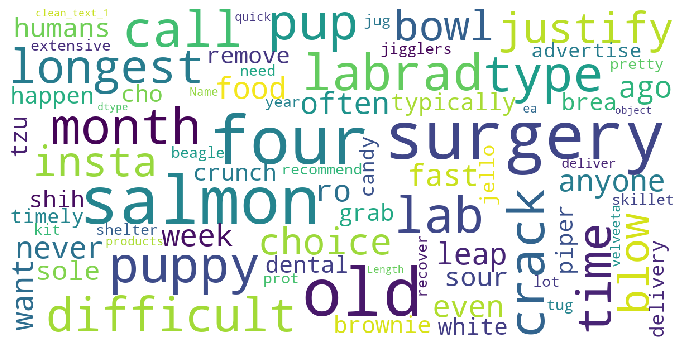

In [205]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=500,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(final_df['clean_text_1'])
# show_wordcloud(Samsung_Reviews_positive['Reviews'])

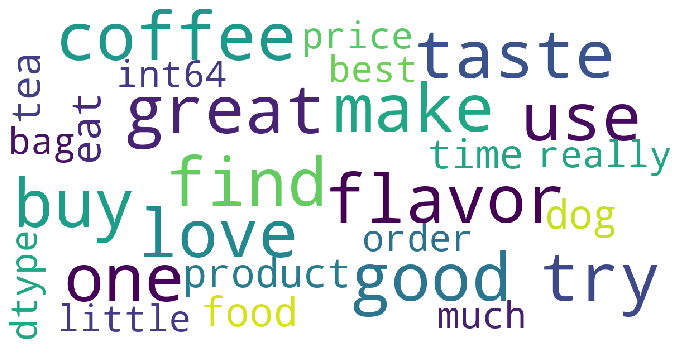

In [206]:
#### word  cloud for positive review
show_wordcloud(freq_positive_review)

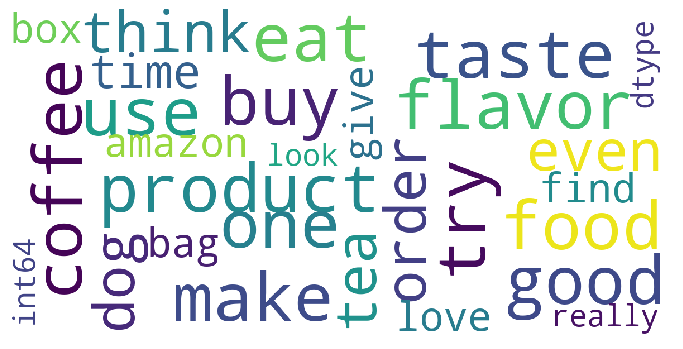

In [207]:
#### word  cloud for freq_negative_review
show_wordcloud(freq_negative_review)

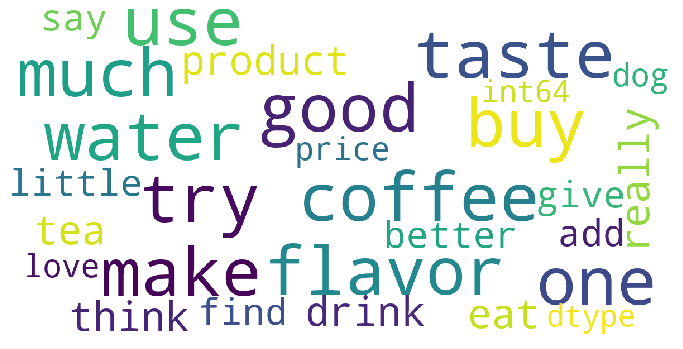

In [208]:
#### word  cloud for freq_neutral_review
show_wordcloud(freq_neutral_review)

In [188]:
#### finally data cleanning is done
### lets save the final df in csv 
final_df.to_csv("final_clean_data.csv",index=False)